# Phân tích chỉ số chất lượng không khí (Air Quality Index) của USA

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-2.png)

**Dataset Source:**  https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates  

**Chú thích các đặc trưng trong tập dữ liệu:**   
- **City**: thành phố  
- **AQI**: chỉ số chất lượng không khí  
- **CO**: Carbon Monoxide (chất gây độc cho hệ hô hấp)  
- **PM2.5**: Chỉ số để chỉ các hạt hoặc giọt nhỏ trong không khí có chiều rộng từ 2.5 $\mu$ m trở xuống

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-3.png)

# 1. Khai báo thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# 2. Xử lý dữ liệu

#### 2.1. Đọc dữ liệu

In [17]:
df = pd.read_csv("D:/DATA ANALYST/Mind X/III. Data Analysis/Project/Data.csv")

In [94]:
df.dropna(inplace=True)

df['CO AQI Value'] = df['CO AQI Value'].clip(upper=10)
df['Ozone AQI Value'] = df['Ozone AQI Value'].clip(upper=100)
df['NO2 AQI Value'] = df['NO2 AQI Value'].clip(upper=30)
df['PM2.5 AQI Value'] = df['PM2.5 AQI Value'].clip(upper=250)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16393 entries, 0 to 16694
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  int32  
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  int32  
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  int32  
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  int32  
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
 14  Class               16393 non-null  int32  
dtypes: float64(2), int32(5), int64(5), object(3)
memory u

In [20]:
df.duplicated().sum()

0

In [21]:
location_col = ['Country']
coordination_col = ['lat', 'lng']
categorical_col = ['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
numerical_col = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# 3. Phân tích khai phá dữ liệu (EDA)

## 3.1. Dữ liệu phân tích là số (numerical)

In [22]:
a = len(df['Country'].unique())
print(f'Thực hiện khảo sát không khí trên {a} quốc gia')

Thực hiện khảo sát không khí trên 174 quốc gia


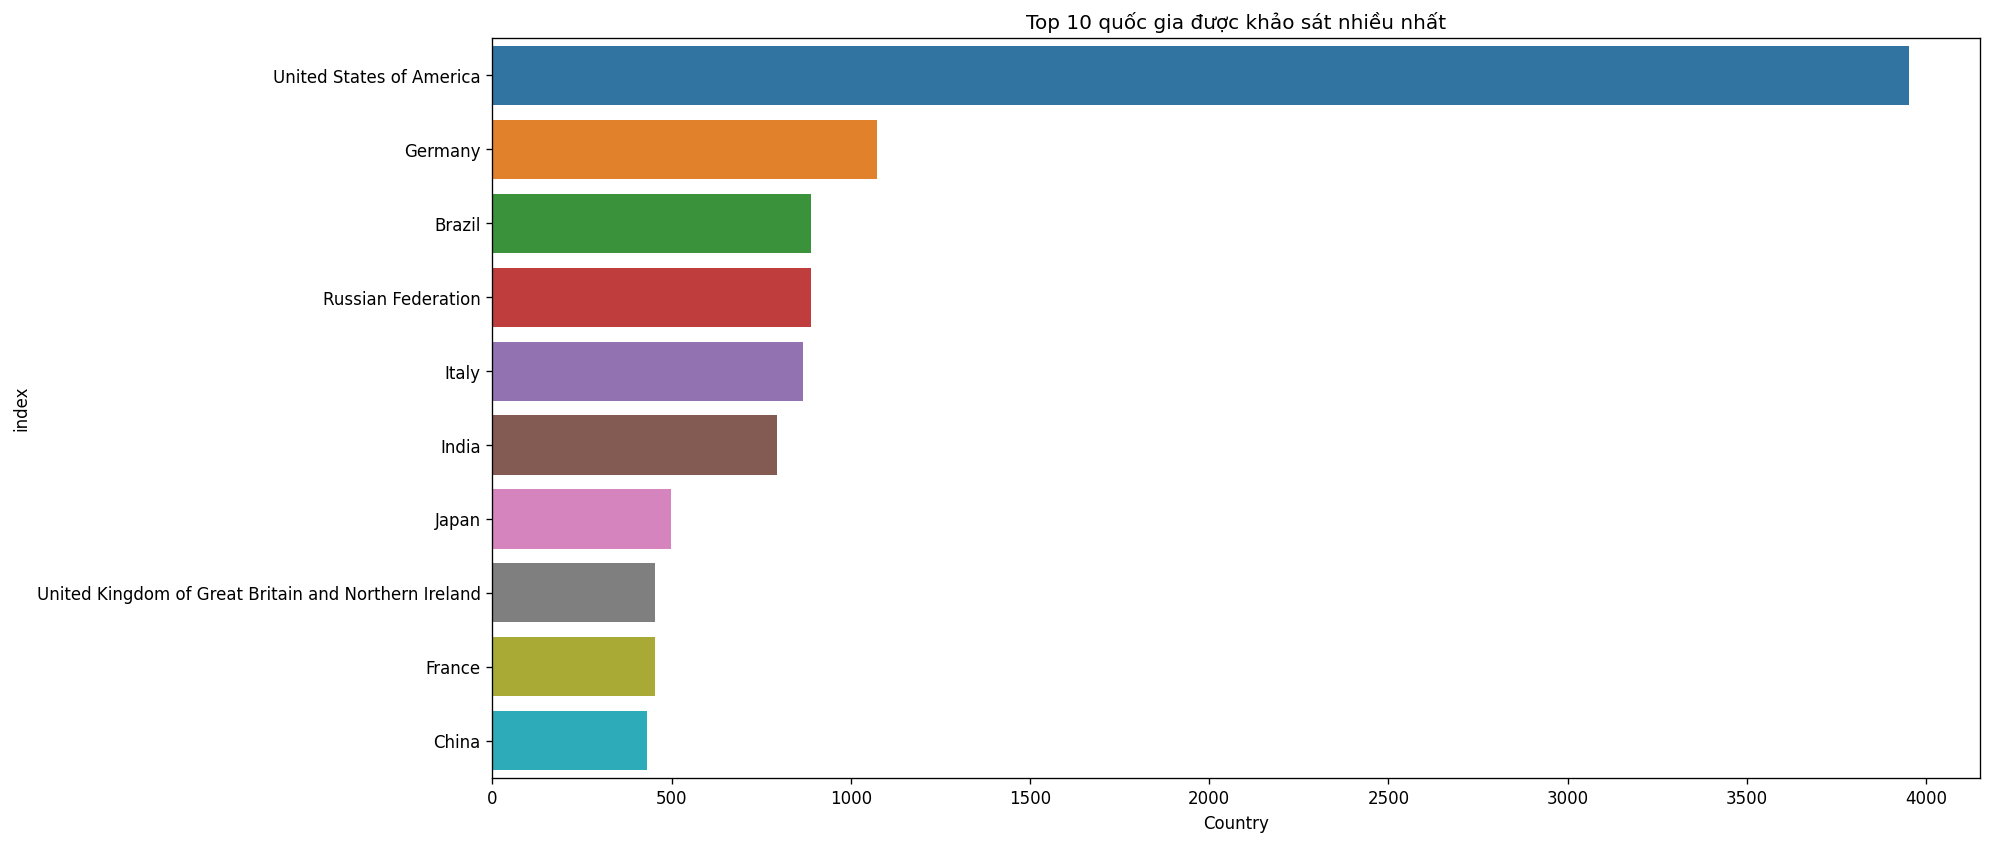

In [23]:
# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))
top_cities = df['Country'].value_counts().sort_values(ascending=False)[:10].reset_index()
sns.barplot(data=top_cities, y='index', x='Country')  # 'City' represents the count column
plt.title('Top 10 quốc gia được khảo sát nhiều nhất')
plt.show()

Text(0, 0.5, 'Latitude')

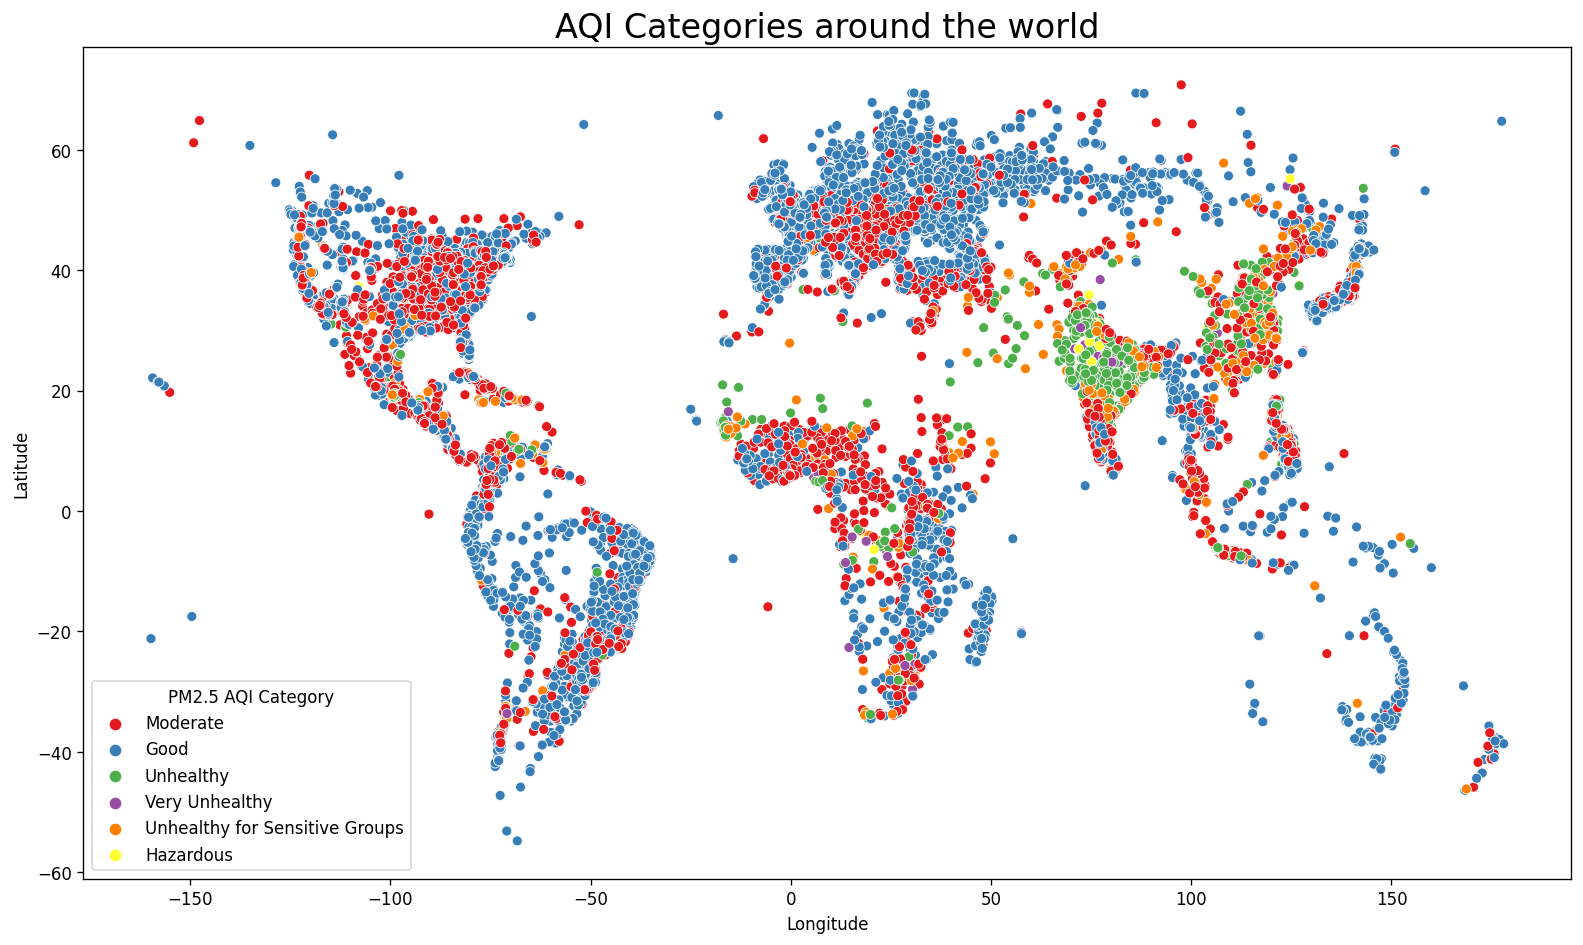

In [24]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='PM2.5 AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#### 3.1.4.Nhận xét dữ liệu các tại các điểm đo đạc

In [25]:
df[numerical_col].describe()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,16393.000000,16393.000000,16393.000000,16393.000000
mean,1.294333,30.713048,3.791923,59.522418
std,1.168326,17.530591,5.548179,39.692012
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,34.000000
50%,1.000000,29.000000,2.000000,52.000000
75%,1.000000,38.000000,5.000000,69.000000
max,10.000000,100.000000,30.000000,250.000000


#### 3.1.5.Vẽ biểu đồ Histogram thể hiện phân phối của các tiêu chí đo khác nhau 

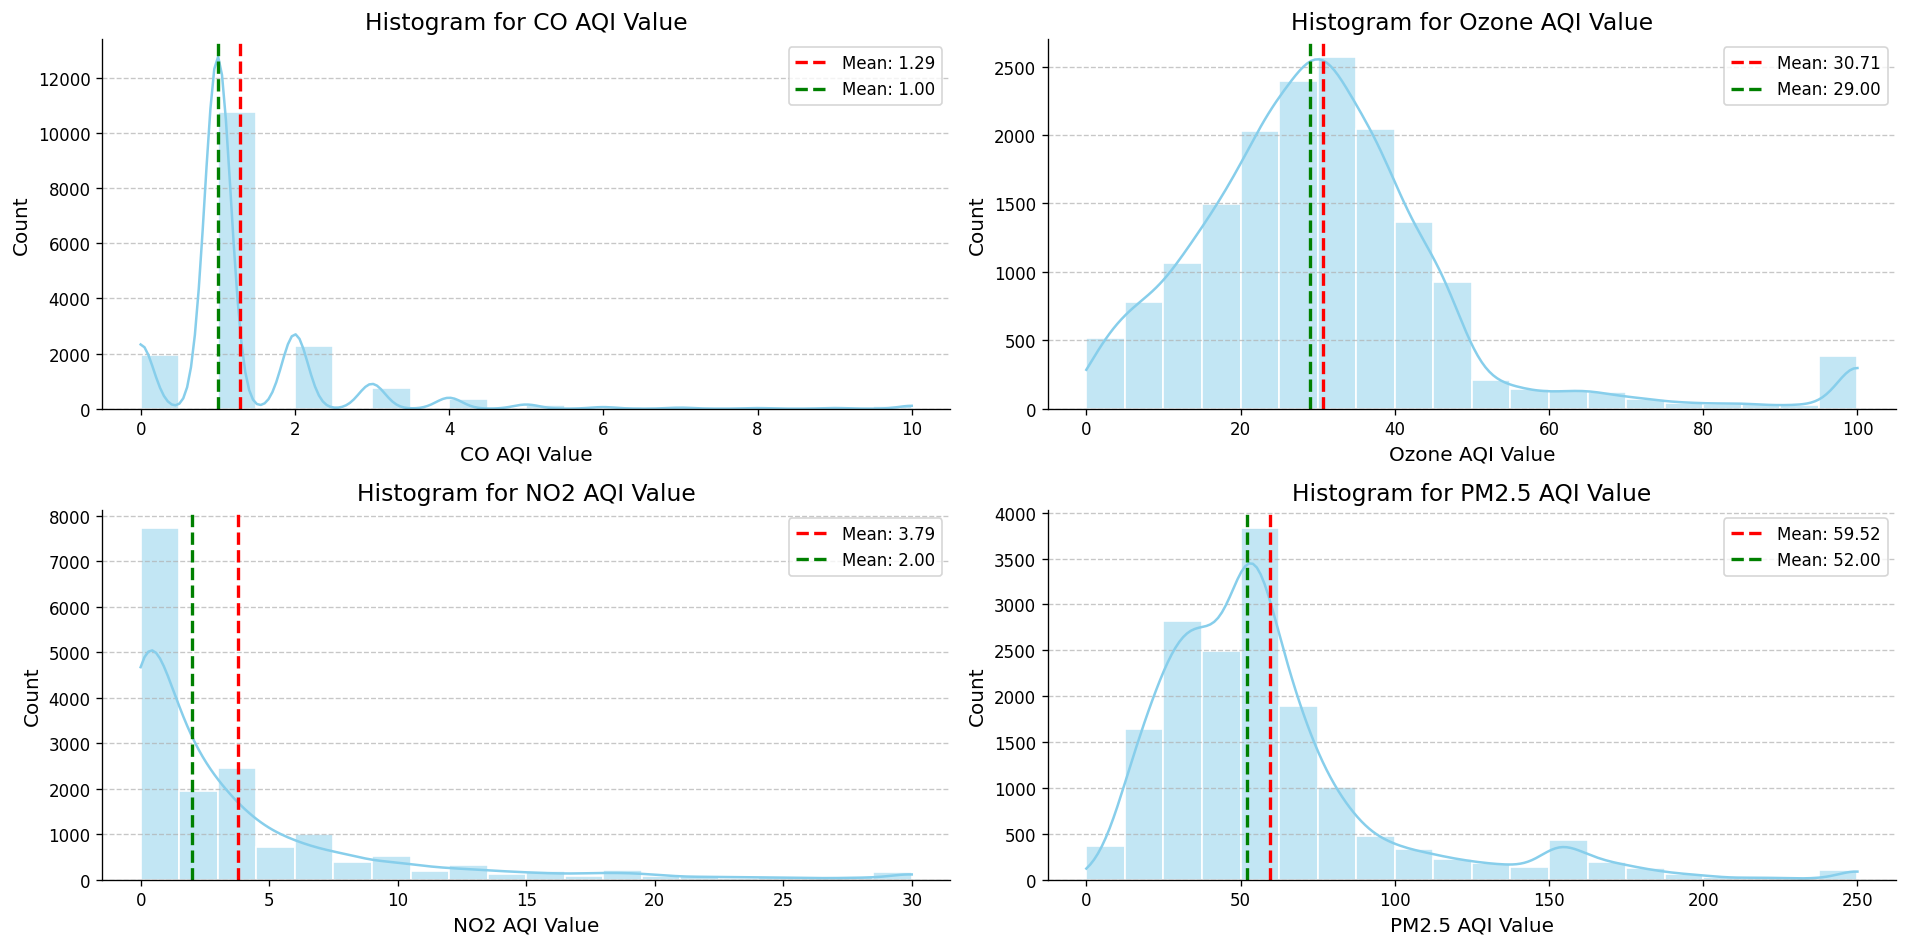

In [27]:
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df[numerical_col] if df[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    # Use sns.histplot for better customization and aesthetics
    sns.histplot(df[x], kde=True, ax=axes[row_idx, col_idx], color='skyblue', bins=20, edgecolor='white')
    # Customize the subplot
    axes[row_idx, col_idx].set_xlabel(x, fontsize=12)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=12)
    axes[row_idx, col_idx].set_title(f'Histogram for {x}', fontsize=14)
    # Set grid and style
    axes[row_idx, col_idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row_idx, col_idx].spines['right'].set_visible(False)
    axes[row_idx, col_idx].spines['top'].set_visible(False)
    # Add mean line
    mean_val = df[x].mean()
    axes[row_idx, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
    # Add median line
    mean_val = df[x].median()
    axes[row_idx, col_idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### 3.1.7. Vẽ biểu đồ bar thể hiện Top 10 quốc gia có giá trị AQI cao nhất

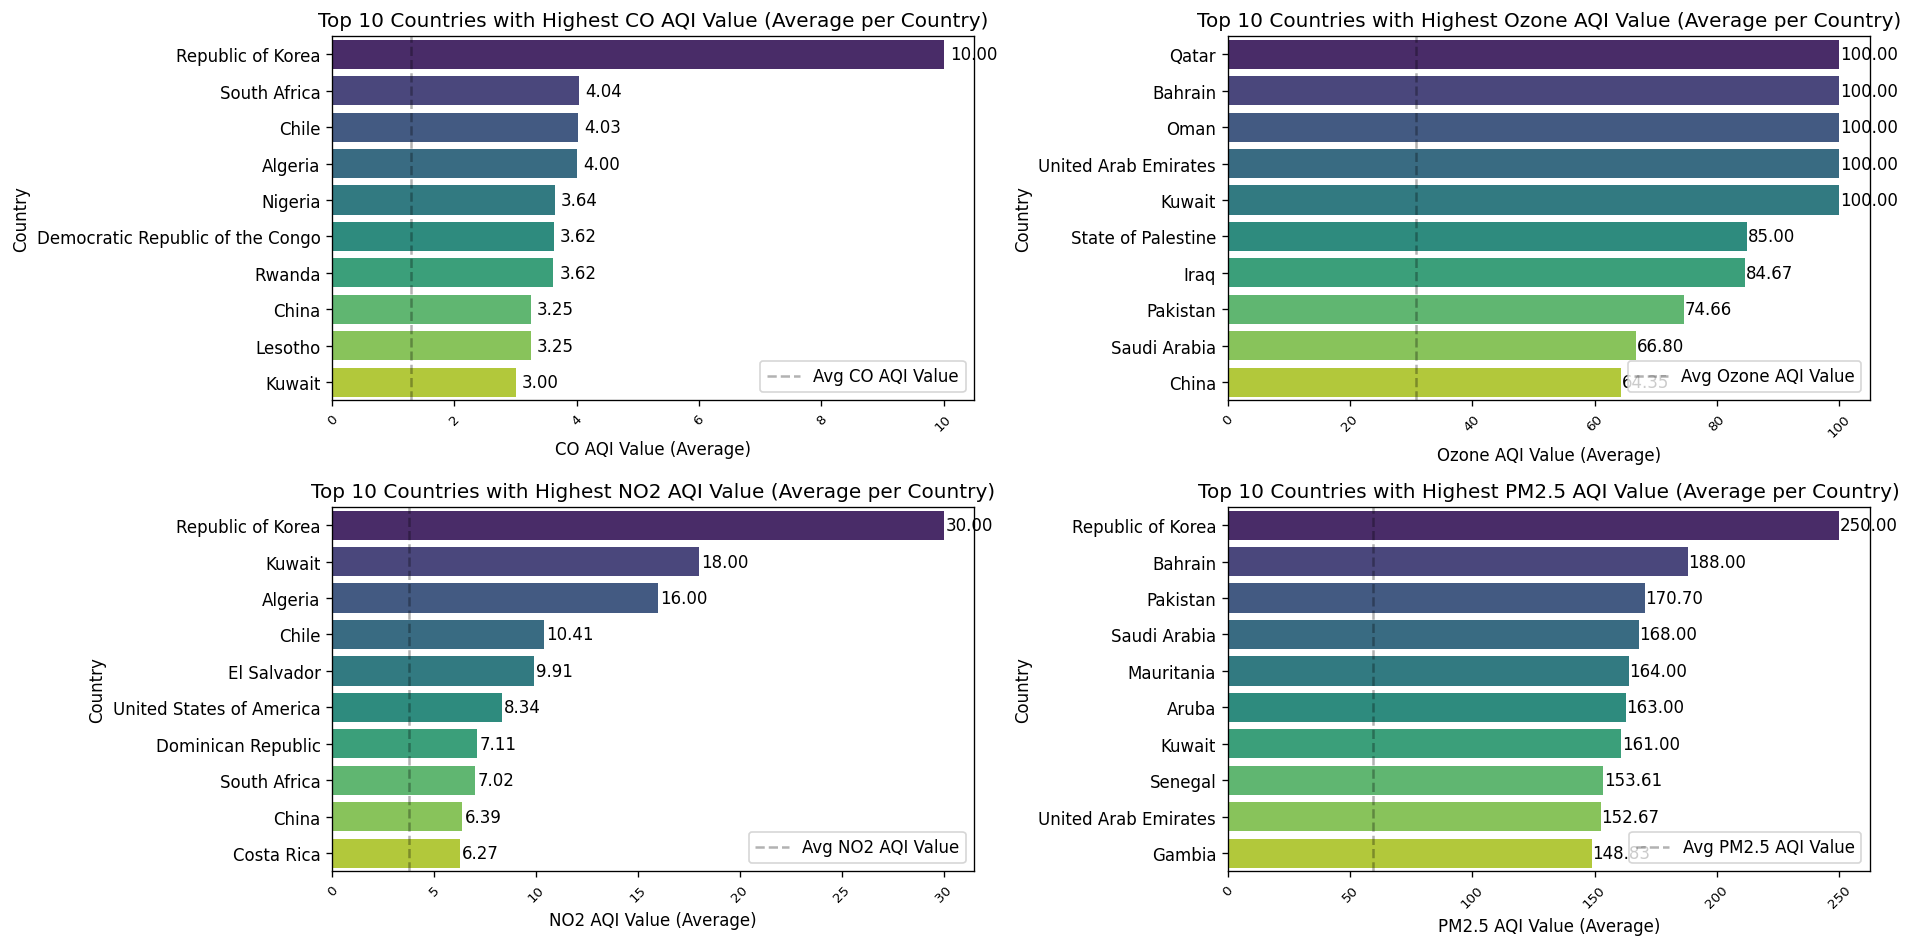

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df[numerical_col] if df[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    df_grouped = df.groupby('Country')[x].mean().reset_index().sort_values(x, ascending=False)[:10]
    # Set a color palette
    sns.set_palette("viridis")
    # Create a color map based on the values of the x column
    color_map = sns.color_palette("viridis", n_colors=len(df_grouped))
    ax = sns.barplot(ax=axes[row_idx, col_idx], data=df_grouped, x=x, y='Country', palette=color_map)
    # Add a horizontal line for the overall mean
    ax.axvline(df[x].mean(), ls='--', color='black', alpha=0.3, label=f'Avg {x}')
    # Customize the plot
    ax.set_title(f'Top 10 Countries with Highest {x} (Average per Country)', fontsize=12)
    ax.set_xlabel(f'{x} (Average)', fontsize=10)
    ax.set_ylabel('Country', fontsize=10)
    ax.legend()
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', color='black')
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [44]:
df["Country"].value_counts()

United States of America    3954
Germany                     1072
Brazil                       890
Russian Federation           889
Italy                        866
                            ... 
Luxembourg                     1
Saint Lucia                    1
Republic of Korea              1
Solomon Islands                1
Monaco                         1
Name: Country, Length: 174, dtype: int64

# 4. Unsupervised

In [30]:
df['CO AQI Category'].replace({'Good':5,'Unhealthy for Sensitive Groups':1,'Moderate':4},inplace = True)
df['Ozone AQI Category'].replace({'Good':5,'Moderate':4,'Unhealthy':3,'Very Unhealthy':2,'Unhealthy for Sensitive Groups':1},inplace = True)
df['NO2 AQI Category'].replace({'Good':5,'Moderate':4},inplace = True)
df['PM2.5 AQI Category'].replace({'Hazardous':0,'Unhealthy for Sensitive Groups':1,'Very Unhealthy':2,'Unhealthy':3,'Moderate':4,'Good':5},inplace = True)
df['AQI Category'].replace({'Hazardous':0, 'Very Unhealthy':1, 'Unhealthy for Sensitive Groups':2, 'Unhealthy':3, 'Moderate':4, 'Good':5}, inplace=True)

df['CO AQI Category']= df['CO AQI Category'].astype(int)
df['Ozone AQI Category']= df['Ozone AQI Category'].astype(int)
df['NO2 AQI Category']= df['NO2 AQI Category'].astype(int)
df['PM2.5 AQI Category']= df['PM2.5 AQI Category'].astype(int)

In [31]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,4,1,5,36,5,0,5,51,4,44.7444,44.2031
1,Brazil,Presidente Dutra,41,5,1,5,5,5,1,5,41,5,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,5,1,5,5,5,1,5,41,5,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,4,1,5,39,5,2,5,66,4,37.1667,15.1833
4,Poland,Przasnysz,34,5,1,5,34,5,0,5,20,5,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,4,1,5,34,5,5,5,54,4,37.5516,-77.3285
16691,Slovakia,Martin,71,4,1,5,39,5,1,5,71,4,49.0650,18.9219
16692,Slovakia,Martin,71,4,1,5,39,5,1,5,71,4,36.3385,-88.8513
16693,France,Sceaux,50,5,1,5,20,5,5,5,50,5,48.7786,2.2906


In [69]:
X= df.drop(['Country', 'City', 'AQI Value', 'AQI Category', 'lat', 'lng'],axis=1)

#### Silhouette Method

In [70]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
si = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    si.append(score)

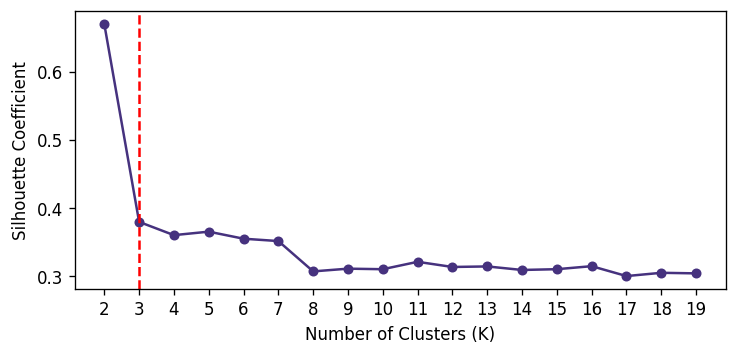

In [71]:
#Vẽ biểu đồ độ chính xác Silhouette 
plt.plot(range(2, 20), si,'.-',markersize=10) 
plt.xticks(range(2, 20)) 
plt.axvline(x=3, color='r', linestyle='--') 
plt.xlabel("Number of Clusters (K)") 
plt.ylabel("Silhouette Coefficient") 
plt.show()

#### Elbow Method

In [72]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(2, 20): 
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_/1000)

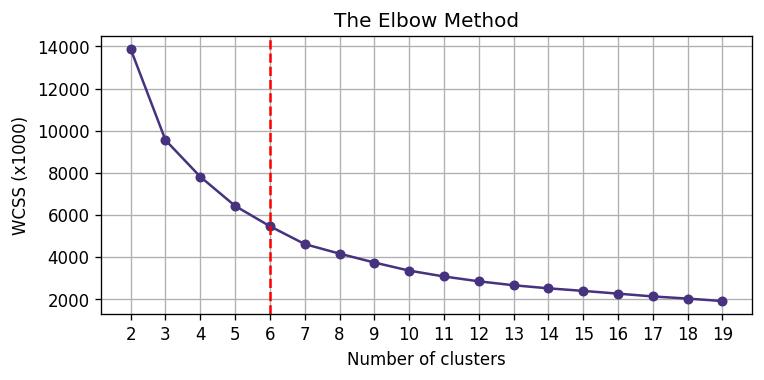

In [73]:
#Vẽ biểu đồ độ chính xác Elbow 
plt.plot(range(2, 20), wcss,'.-',markersize=10) 
plt.xticks(range(2, 20)) 
plt.axvline(x=6, color='r', linestyle='--') 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS (x1000)') 
plt.grid(linestyle='-') 
plt.show()

#### Hierachical Clustering 

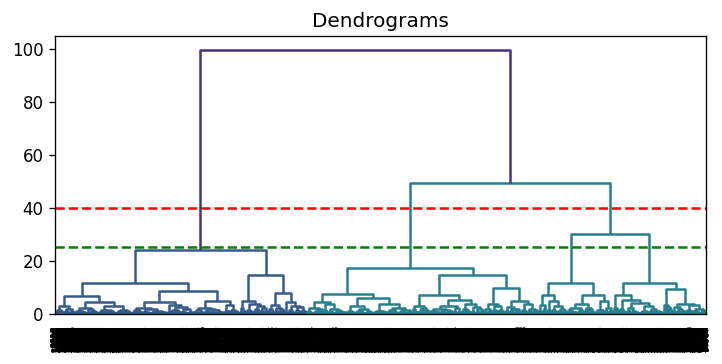

In [40]:
from sklearn.preprocessing import normalize 
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
data_to_normalize = df.drop(['Country', 'City', 'AQI Value', 'AQI Category'], axis=1)
data_scaled = normalize(data_to_normalize.values)  # Use .values to extract the NumPy array
data_scaled = pd.DataFrame(data_scaled, columns=data_to_normalize.columns)

plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))  # Use the normalized data
plt.axhline(y=40, color='r', linestyle='--') 
plt.axhline(y=25, color='green', linestyle='--')

plt.show()


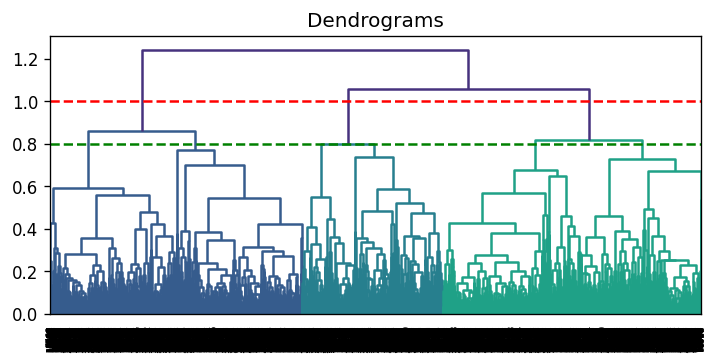

In [41]:
from sklearn.preprocessing import normalize 
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
data_to_normalize = df.drop(['Country', 'City', 'AQI Value', 'AQI Category'], axis=1)
data_scaled = normalize(data_to_normalize.values)  # Use .values to extract the NumPy array
data_scaled = pd.DataFrame(data_scaled, columns=data_to_normalize.columns)
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(data_scaled, method='weighted'))  # Use the normalized data
plt.axhline(y=1, color='r', linestyle='--') 
plt.axhline(y=0.8, color='green', linestyle='--')

plt.show()


#### Modeling

In [74]:
from sklearn.cluster import KMeans #Import model KMeans 
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)  #Training 
y_pred = kmeans.predict(X) # Gán

In [75]:
centers = kmeans.cluster_centers_

In [76]:
df['AQI Category']=y_pred

In [85]:
numerical_col = ['CO AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'Ozone AQI Value', 'AQI Category']

In [86]:
df[numerical_col]

,CO AQI Value,NO2 AQI Value,PM2.5 AQI Value,Ozone AQI Value,AQI Category
0,1,0,51,36,0
1,1,1,41,5,2
2,1,1,41,5,2
3,1,2,66,39,0
4,1,0,20,34,2
...,...,...,...,...,...
16690,1,5,54,34,0
16691,1,1,71,39,0
16692,1,1,71,39,0
16693,1,5,50,20,0


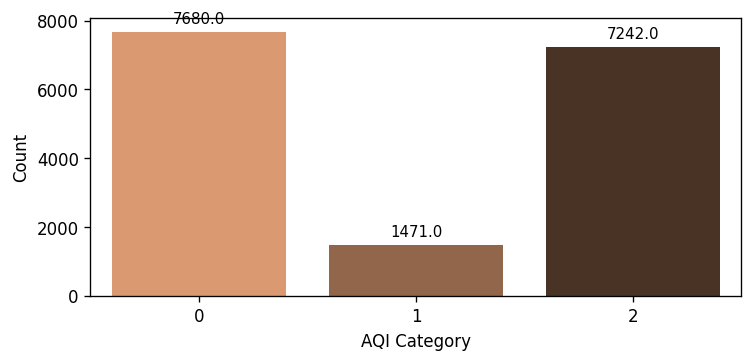

In [87]:
ax = sns.countplot(data=df[numerical_col], x='AQI Category', palette='copper_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('AQI Category')
ax.set_ylabel('Count')
plt.show()

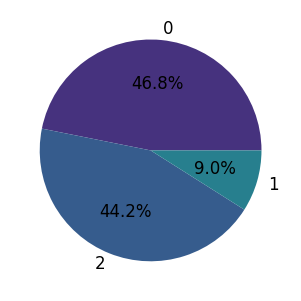

In [88]:
import matplotlib.pyplot as plt
plt.pie(df['AQI Category'].value_counts(), autopct='%1.1f%%', labels=['0', '2', '1'])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10092\351237785.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(x=i,hue= 'AQI Category', data= df[numerical_col], palette=palette, kde=True)


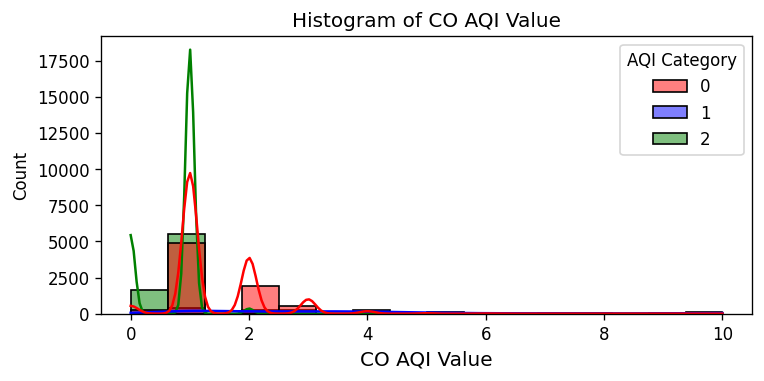

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10092\351237785.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(x=i,hue= 'AQI Category', data= df[numerical_col], palette=palette, kde=True)


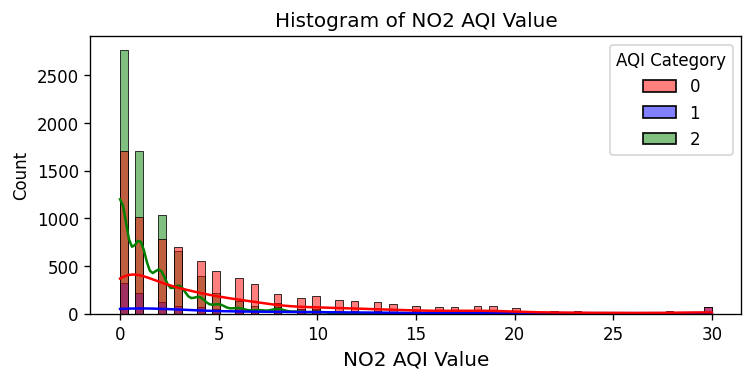

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10092\351237785.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(x=i,hue= 'AQI Category', data= df[numerical_col], palette=palette, kde=True)


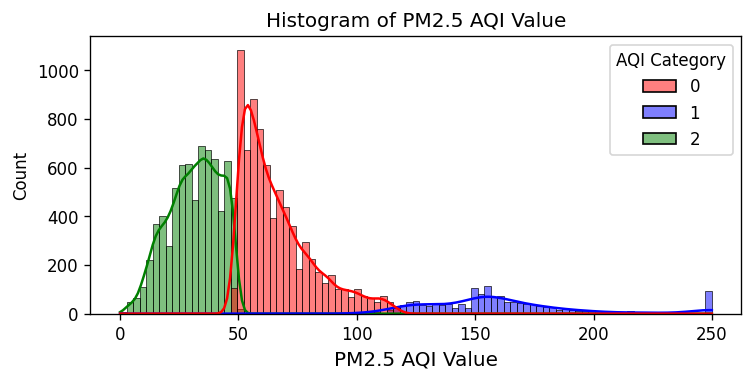

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10092\351237785.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(x=i,hue= 'AQI Category', data= df[numerical_col], palette=palette, kde=True)


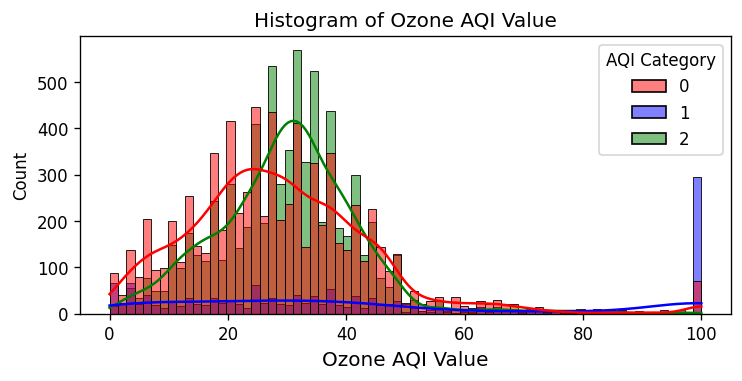

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10092\351237785.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(x=i,hue= 'AQI Category', data= df[numerical_col], palette=palette, kde=True)


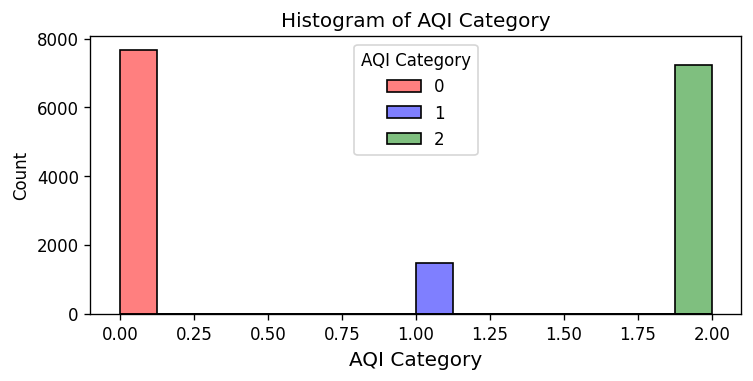

In [89]:
for i in numerical_col:
    palette = ['red', 'blue','green','k']
    sns.histplot(x=i,hue= 'AQI Category', data= df[numerical_col], palette=palette, kde=True)

    plt.title(f'Histogram of {i}')
    plt.xlabel(i, fontsize=12)
    plt.show()

In [90]:
df['AQI Category'].replace({1: 'Hazardous', 0: 'Moderate', 2: 'Good'}, inplace=True)

Text(0, 0.5, 'Latitude')

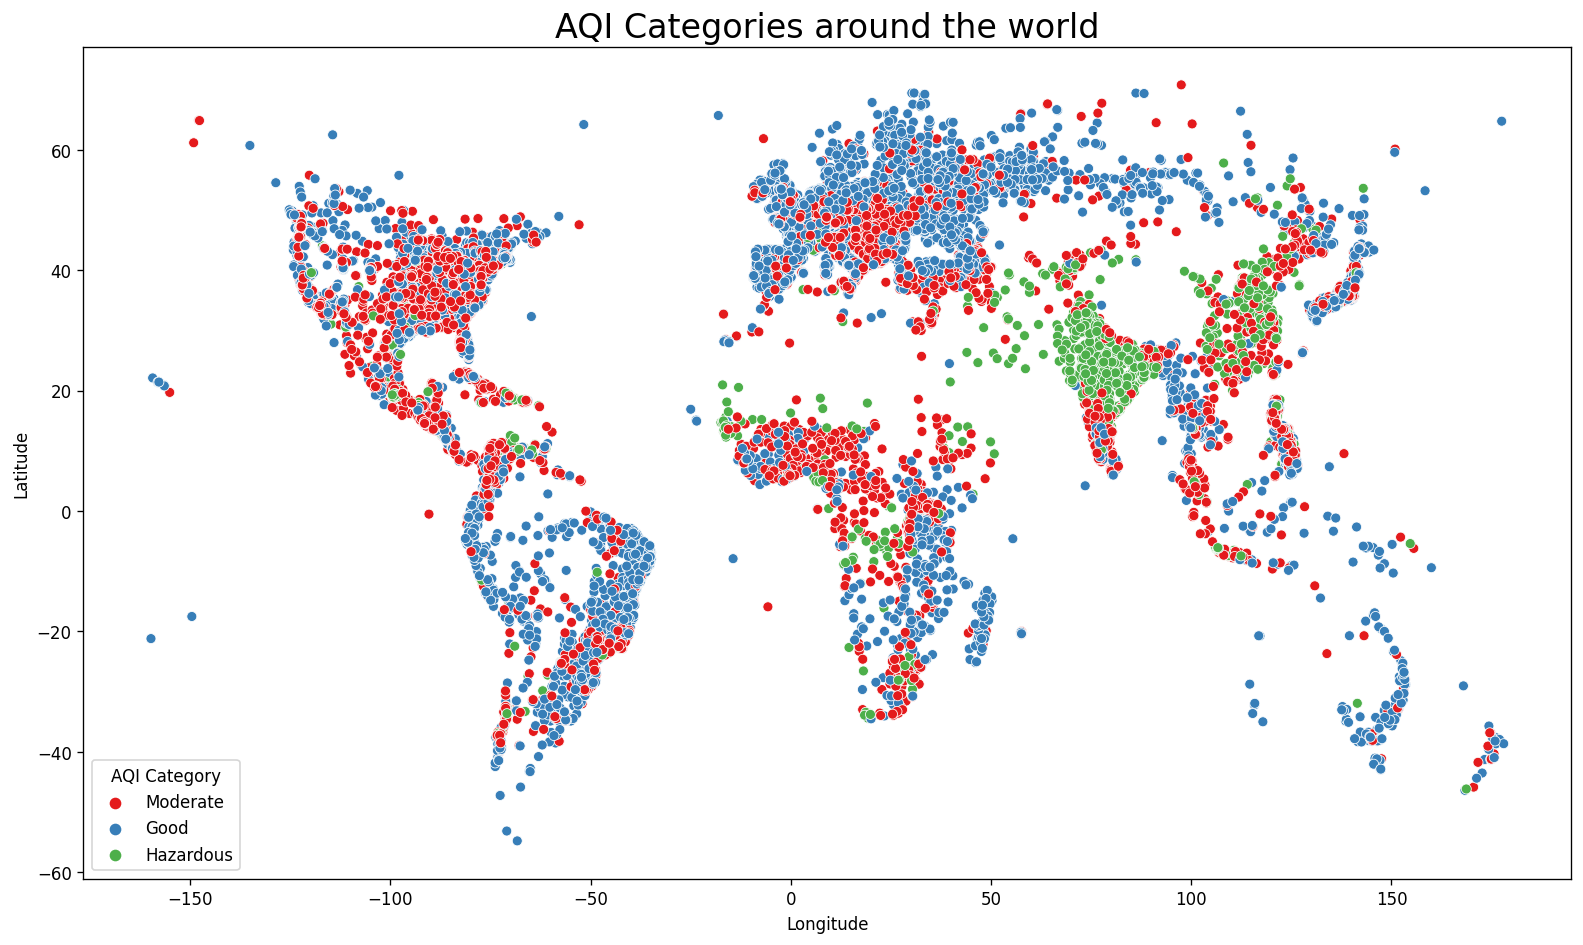

In [91]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')